# Lab 3: Primality Testing

## Part 1

Implement the *modexp* function in Figure 1.4 (pg 19 of the text book) for modular
exponentiation. It should take as input three integers x,y and N and return x^y mod N

In [1]:
!pip install matplotlib

zsh:1: command not found: pip


In [2]:
def modexp(x, y, N):
    if y == 0:
        return 1
    z = modexp(x, y // 2, N)
    if y % 2 == 0:
        return (z * z) % N
    else:
        return (x * (z * z)) % N

In [3]:
assert modexp(1, 10, 100) == 1
assert modexp(1, 0, 100) == 1
assert modexp(3, 10, 5) == 4
modexp(6, 100, 1000)

376

In [4]:
import random

def is_probably_prime(N, k):
    if N == 2 or N == 3:
        return True
    if N == 1 or N % 2 == 0:
        return False

    for i in range(k):
        a = random.randint(2, N-1)
        x = modexp(a, N-1, N)
        if x != 1:
            return False
    return True

def primality_test(N, k):
    if is_probably_prime(N, k):
        print(f"{N} is prime")
    else:
        print(f"{N} is not prime")


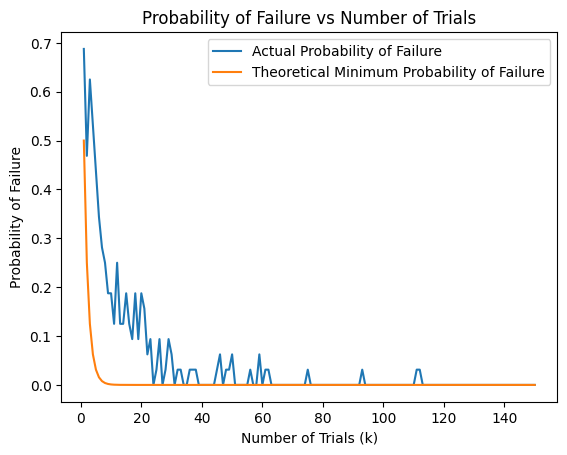

In [5]:
import matplotlib.pyplot as plt

def verify_probability_of_failure(carmichael_numbers, k_max):
    k_values = range(1, k_max+1)
    failure_probabilities = []
    theoretical_probabilities = [1/(2**k) for k in k_values]
    for k in k_values:
        failure_count = 0
        for N in carmichael_numbers:
            if is_probably_prime(N, k):
                failure_count += 1
        probability_of_failure = failure_count / len(carmichael_numbers)
        failure_probabilities.append(probability_of_failure)

    plt.plot(k_values, failure_probabilities, label='Actual Probability of Failure')
    plt.plot(k_values, theoretical_probabilities, label='Theoretical Minimum Probability of Failure')
    plt.xlabel('Number of Trials (k)')
    plt.ylabel('Probability of Failure')
    plt.title('Probability of Failure vs Number of Trials')
    plt.legend()
    plt.show()

carmichael_numbers = [561, 1105, 1729, 2465, 2821, 6601, 8911, 10585, 15841,
                      29341, 41041, 46657, 52633, 62745, 63973, 75361, 101101, 115921, 126217,
                      162401, 172081, 188461, 252601, 278545, 294409, 314821, 334153, 340561,
                      399001, 410041, 449065, 488881]
k_max = 150
verify_probability_of_failure(carmichael_numbers, k_max)

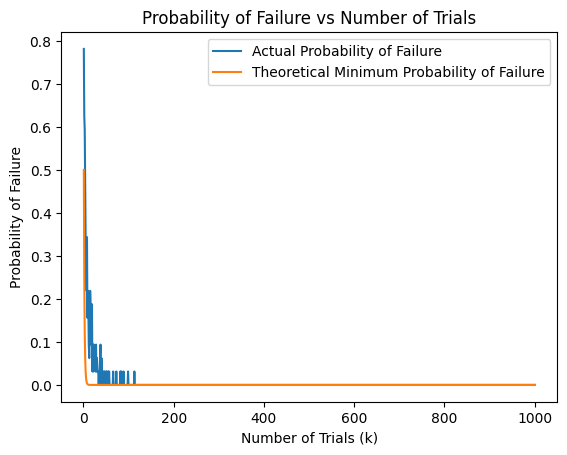

In [6]:
k_max = 1000
verify_probability_of_failure(carmichael_numbers,k_max)